# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")


# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
# Checking the number of mice.
num_mice = merged_df["Mouse ID"].nunique()
print(f"Number of mice: {num_mice}")

Number of mice: 249


In [15]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ids = merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df.drop_duplicates(subset=["Mouse ID"], keep="first")
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [21]:
# Checking the number of mice in the clean DataFrame.
num_cleaned_mice = cleaned_df["Mouse ID"].nunique()
num_cleaned_mice

249

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename columns for clarity
summary_statistics = summary_statistics.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err.'
})

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_advanced = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem='sem'
)

# Display the advanced summary statistics table
summary_statistics_advanced

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

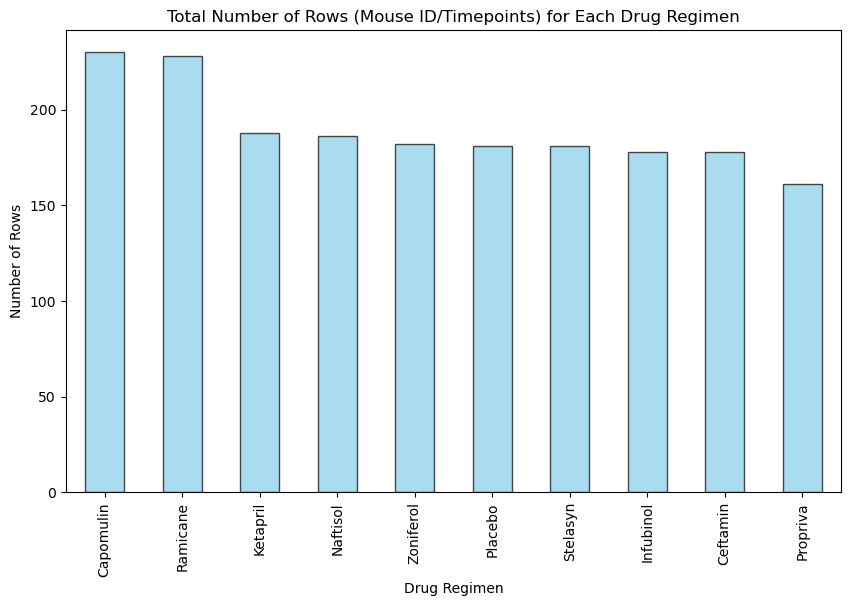

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Generate a bar plot using Pandas
rows_per_regimen = merged_df['Drug Regimen'].value_counts()
rows_per_regimen.plot(kind='bar', color='skyblue', alpha=0.7, edgecolor='black', figsize=(10, 6))

# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')

# Show the plot
plt.show()

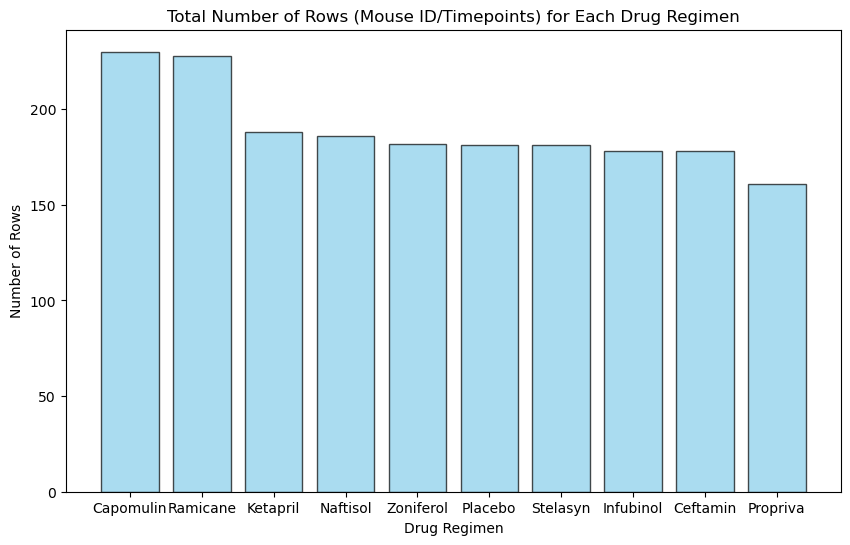

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
rows_per_regimen = merged_df['Drug Regimen'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(rows_per_regimen.index, rows_per_regimen, color='skyblue', alpha=0.7, edgecolor='black')

# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')

# Show the plot
plt.show()

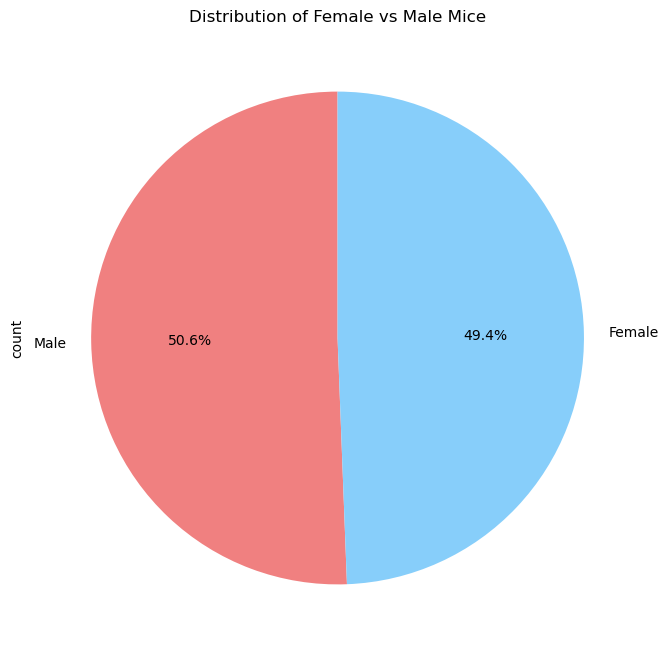

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = merged_df['Sex'].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=90, figsize=(8, 8))

# Set plot title
plt.title('Distribution of Female vs Male Mice')

# Show the plot
plt.show()

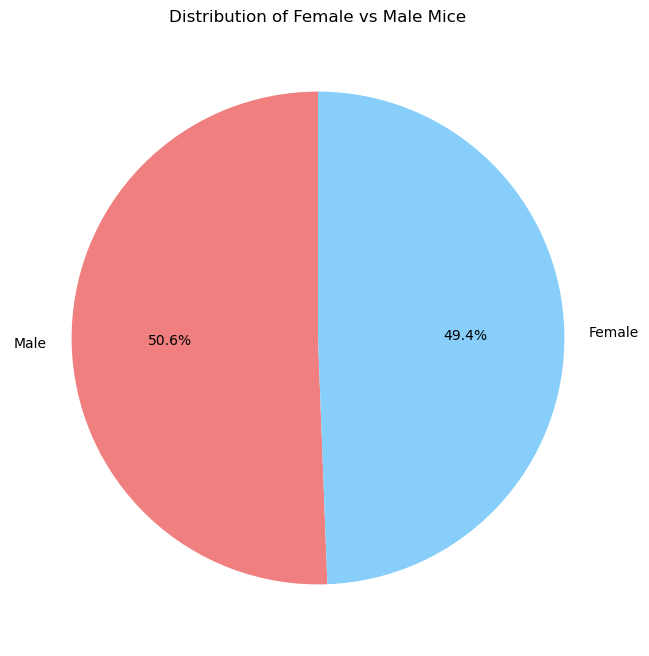

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Count the distribution of female versus male mice
gender_distribution = merged_df['Sex'].value_counts()

# Create a pie plot
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=90)

# Set plot title
plt.title('Distribution of Female vs Male Mice')

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = merged_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoint_df, merged_df, on=['Mouse ID', 'Timepoint'], how='left')


In [30]:
# Put treatments into a list for for loop (and later for plot labels)
target_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for regimen in target_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([0.25, 0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
    
    # Print potential outliers
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{regimen}'s potential outliers: {outliers}")

# Display the list of tumor volumes for plotting (if needed)
tumor_vol_data


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 81     47.685963
 84     37.311846
 86     38.125164
 88     38.753265
 109    41.483008
 116    38.846876
 122    28.430964
 125    33.329098
 163    46.539206
 164    32.377357
 170    41.581521
 175    23.343598
 181    40.728578
 184    34.455298
 193    31.023923
 205    40.658124
 209    39.952347
 221    36.041047
 227    28.484033
 240    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 77     33.562402
 78     36.374510
 92     31.560470
 94     36.134852
 97     22.050126
 120    30.564625
 127    31.095335
 158    45.220869
 159    36.561652
 167    37.225650
 169    43.419381
 178    30.276232
 191    40.667713
 218    43.166373
 236    44.183451
 245    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

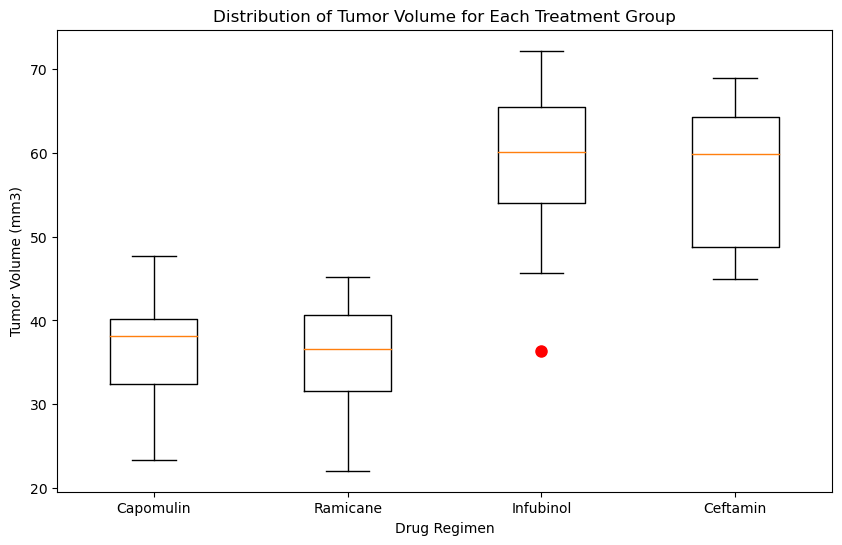

In [31]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=target_regimens, flierprops=dict(marker='o', markersize=8, markerfacecolor='red', markeredgecolor='red'))

# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

# Show the plot
plt.show()

## Line and Scatter Plots

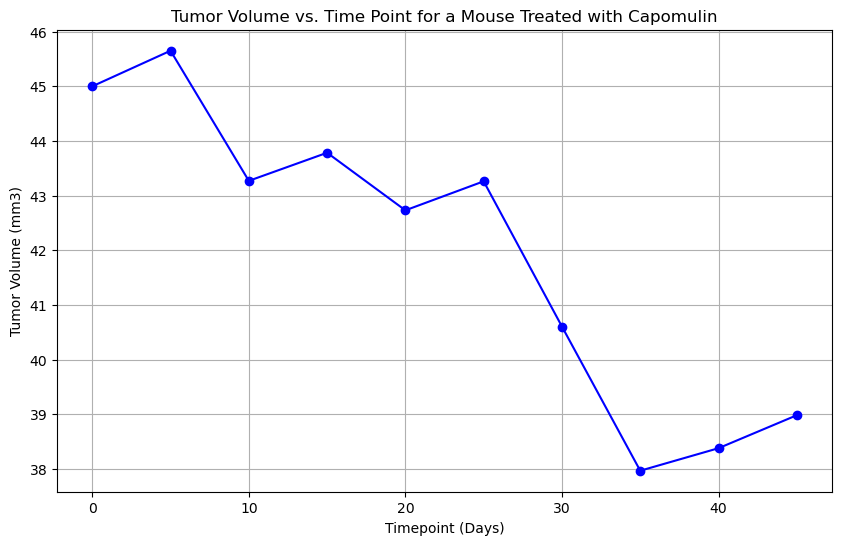

In [32]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Select a single mouse treated with Capomulin
capomulin_mouse = merged_df[(merged_df['Drug Regimen'] == 'Capomulin') & (merged_df['Mouse ID'] == 'b128')]

# Generate a line plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'], marker='o', color='blue')

# Set plot labels and title
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Time Point for a Mouse Treated with Capomulin')

# Show the plot
plt.grid(True)
plt.show()

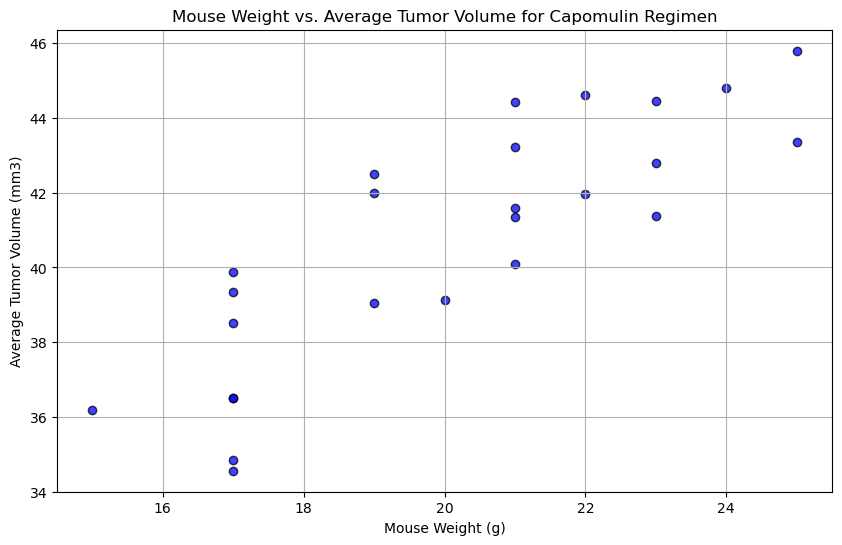

In [33]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Calculate the average observed tumor volume for each mouse in the Capomulin regimen
capomulin_avg_tumor_vol = merged_df[merged_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Extract mouse weight data for the Capomulin regimen
capomulin_mouse_weight = merged_df[merged_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Weight (g)'].unique().apply(lambda x: x[0])

# Generate a scatter plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_mouse_weight, capomulin_avg_tumor_vol, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)

# Set plot labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# Show the plot
plt.grid(True)
plt.show()

## Correlation and Regression

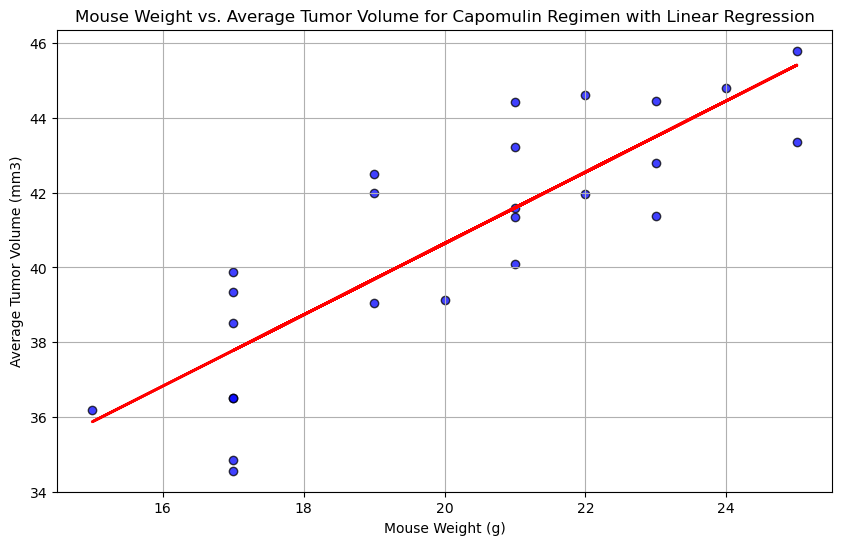

Correlation Coefficient: 0.8419363424694719


In [37]:
from scipy.stats import linregress

# Calculate the correlation coefficient
correlation_coefficient = st.pearsonr(capomulin_mouse_weight, capomulin_avg_tumor_vol)[0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(capomulin_mouse_weight, capomulin_avg_tumor_vol)

# Generate the linear regression line
regress_line = slope * capomulin_mouse_weight + intercept

# Plot the scatter plot and linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_mouse_weight, capomulin_avg_tumor_vol, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)
plt.plot(capomulin_mouse_weight, regress_line, color='red', linewidth=2)

# Set plot labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen with Linear Regression')

# Show the plot
plt.grid(True)
plt.show()

# Print the correlation coefficient
print(f"Correlation Coefficient: {correlation_coefficient}")